In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.grid_search import GridSearchCV
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
import sklearn.metrics as sklm
import random as rd

In [5]:
# uniques values in all non-numerical columns of data frame to find out Nan values
def colUnique(df):
    for x in df.columns:
            if df[x].dtype=='object':
                print(df[x].unique(),'\n')
                
# Converting non-numerical values to numerical values
def dummy(df):
    df=pd.get_dummies(df)
    return df               

# normalizing the whole numerical data
def normalize(df,col):
    for x in col:
        mean=df[x].mean()
        std=df[x].std()
        df[x]=(df[x]-mean)/std
    return df
    
# separating target and input variables.
def sepxy(df,col):
    x=df.drop(col,axis=1)
    y=df[col]
    return x,y

# Randomly shuffling the whole dataframe with respect to rows.
def shuffleit(df):
    return df.sample(frac=1)

# Separating and returning dataframe parts according to K-fold configuration.
def separate(df,k,num):
    if (k*num<=len(df)):
        valid=df.iloc[k*(num-1):k*num]
        train=df.drop(range(k*(num-1),k*num),axis=0)
        return train,valid
    else:
        valid=df.iloc[k*(num-1):]
        train=df.drop(range(k*(num-1),len(df)),axis=0)
        return train,valid


In [6]:
def derivative(x,y,beta):
    return -2 * np.dot(x.transpose(),y - np.dot(x,beta))

def lossfunc(x,y,beta):
    tem = y - np.dot(x,beta)
    return  np.dot(tem.transpose(),tem.transpose())

def rmse(x,y,beta):
    tem = y - np.dot(x,beta)
    return  (tem**2).sum()


def sgd(x,y,beta,alpha,imax,epsilon):
    r,c=x.shape
    betaold=beta
    betanew=np.zeros(c)
    for itr in range(imax):
        for re in range(r):            
            betanew=beta-alpha*derivative(x.iloc[re],y.iloc[re],beta)
            beta=betanew
#        print(lossfunc(x,y,betanew)-lossfunc(x,y,betaold))
        betaold=betanew
    return betanew

In [7]:
mean = 1
sigma= 0.05
x= [rd.normalvariate(mean,sigma ) for i in range(100)]

In [8]:
X=np.array(x)
vector=1.3*(X*X)+4.8*X+8+np.random.rand(100)

In [9]:
X, vector = zip(*sorted(zip(X, vector)))
X=np.array(X)
vector=np.array(vector)

In [11]:
degrees=[1,2,7,10,16,100]
clf=[]
xp=[]
for i in range(len(degrees)):
    poly = PolynomialFeatures(degree=degrees[i],include_bias=True)
    xp.append(poly.fit_transform(X.reshape(-1,1)))
    clf.append(linear_model.LinearRegression())
    clf[i].fit(xp[i], vector)


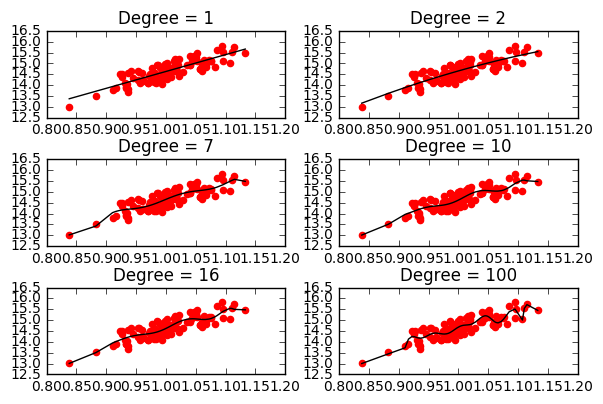

In [25]:
i=0
s = 10
nrow=3
ncol=2  # fontsize
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)
fig.tight_layout()
i=0
axes[0][0].plot(X,clf[i].predict(xp[i]),color='black',label='degree = 1')
axes[0][0].scatter(X,vector,label='degree = 1',color='red')
axes[0][0].set_title('Degree = 1')
i=1
axes[0][1].plot(X,clf[i].predict(xp[i]),color='black',label='degree = 2')
axes[0][1].scatter(X,vector,label='degree = 2',color='red')
axes[0][1].set_title('Degree = 2')
i=2
axes[1][0].plot(X,clf[i].predict(xp[i]),color='black',label='degree = 7')
axes[1][0].scatter(X,vector,label='degree = 17',color='red')
axes[1][0].set_title('Degree = 7')
i=3
axes[1][1].plot(X,clf[i].predict(xp[i]),color='black',label='degree = 10')
axes[1][1].scatter(X,vector,label='degree = 10',color='red')
axes[1][1].set_title('Degree = 10')
i=4
axes[2][0].plot(X,clf[i].predict(xp[i]),color='black',label='degree = 16')
axes[2][0].scatter(X,vector,label='degree = 16',color='red')
axes[2][0].set_title('Degree = 16')
i=5
axes[2][1].plot(X,clf[i].predict(xp[i]),color='black',label='degree = 100')
axes[2][1].scatter(X,vector,label='degree = 100',color='red')
axes[2][1].set_title('Degree = 100')

plt.show()



In [237]:

print(sklm.mean_squared_error(clf[0].predict(xp[0]),vector))
print(sklm.mean_squared_error(clf[1].predict(xp[1]),vector))
print(sklm.mean_squared_error(clf[2].predict(xp[2]),vector))
print(sklm.mean_squared_error(clf[3].predict(xp[3]),vector))
print(sklm.mean_squared_error(clf[4].predict(xp[4]),vector))
print(sklm.mean_squared_error(clf[5].predict(xp[5]),vector))



0.093302584019
0.0930384227062
0.0917313252244
0.0872110847373
0.0867565629934
0.0819211255347


In [28]:
lamb=[1,0,0.001,0.0000001]
poly = PolynomialFeatures(degree=10)
Xnew= poly.fit_transform(X.reshape(-1,1))
clf=[]
for x,y in zip(lamb,range(4)):
    clf.append(linear_model.Ridge(alpha=lamb[y]))
    clf[y].fit(Xnew, vector)


In [29]:
i=0
s = 10
nrow=2
ncol=2  # fontsize
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)
fig.tight_layout()
i=0
axes[0][0].plot(X,clf[i].predict(Xnew),color='black')
axes[0][0].scatter(X,vector,color='red')
axes[0][0].set_title('lambda = 1')
i=1
axes[0][1].plot(X,clf[i].predict(Xnew),color='black')
axes[0][1].scatter(X,vector,color='red')
axes[0][1].set_title('lambda = 0')
i=2
axes[1][0].plot(X,clf[i].predict(Xnew),color='black')
axes[1][0].scatter(X,vector,color='red')
axes[1][0].set_title('lambda = 0.001')
i=3
axes[1][1].plot(X,clf[i].predict(Xnew),color='black')
axes[1][1].scatter(X,vector,color='red')
axes[1][1].set_title('lambda = 0.000001')
plt.show()



In [30]:

print(sklm.mean_squared_error(clf[0].predict(Xnew),vector))
print(sklm.mean_squared_error(clf[1].predict(Xnew),vector))
print(sklm.mean_squared_error(clf[2].predict(Xnew),vector))
print(sklm.mean_squared_error(clf[3].predict(Xnew),vector))



0.0801595269023
0.0664424668496
0.0723496562723
0.0716668853798
